In [3]:
!pip install tweepy==4.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0


# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from collections import Counter

Download Resources

In [5]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Define Keys

In [6]:
key = "3iheouUTELiex3FpGHnifZTMj"
secret_key = "mw6ykGdLn51pXbK2tbIBjEX1nRzI5JLKttZHxMqIwDTsCY41Yh"

bearer_Token = "AAAAAAAAAAAAAAAAAAAAAE4PdwEAAAAAkI5b%2Ba70gnMUvno4CGir%2FAZf6lg%3Du2mFUh8gLYz3dMDvXI9tiCGOhPS6jz3d4m4M8wdEm6dhkzM9zK"
access_Token = "1327790986752352258-zK66omnCAQfOJisM2Sa9EK8Awr0yi0"
access_TokenS = "Md07k3RsxNXr2y7hbMSJwo3oT9KRKGzwJn8rd5y5lfz7B" 
Client_ID = "T253d0RJQzBjX1dKem1vRXVlTUE6MTpjaQ"
Client_Secret = "RgmzcFp7una0F0im_wPvkzTUZcZeC7Lv5CMjT2eJmN4mwLhpff"

Authentication for API

In [7]:
client = tweepy.Client(bearer_Token,key,secret_key,access_Token,access_TokenS)

# Import Data

Downloading Tweets with the Word "Zalando"

In [6]:
query = 'Zalando -is:retweet'
paginator = tweepy.Paginator(
    client.search_recent_tweets,
    query=query
)

tweet_list = []

for tweet in paginator.flatten():
  tweet_list.append(tweet)
  print(tweet)

Nike Sportswear Dunk Unisex Pure Platinum/White/Wolf Grey
🔗 https://t.co/Z9uN4y3atl

on Zal
#sneakers #sneakerhead #reseller
Showheroes, Zalando, Oberalp: Das sind die wichtigsten Köpfe der Woche https://t.co/aG9OPdVsRT
laska na tiktoku powiedziala ze ma taka ladna torebke z zalando ale nie chciala powiedziec jaki model, wiec przetrzepalam 34 strony na tym zalando i jej nie znalazlam, chyba oszukala
wgl ja jestem uzależniona od zakupów, czekam na 13!! paczek z aliexpress i wczoraj znalazłam takie piękne kalosze w MUCHOMORKI CZERWONE na zalando ale gdzie ja będę w nich chodzić..
@ohlachienneter Bonjour,
Nous sommes désolés pour le retard.
Pour que nous puissions vous aider au plus vite, merci de nous recontacter via le Formulaire de contact, le Chat ou notre numéro de Téléphone depuis la rubrique Aide &amp; Contact : https://t.co/Pf7WvtVSkB
Bonne journée !
@cml_anthony Bonjour !
Nous sommes désolés de cette expérience.
Pour que nous puissions vous aider au plus vite, merci de nous recon

Transforming Tweets List in a Dataframe

In [7]:
df = pd.DataFrame(tweet_list)
df = pd.DataFrame(df['text'])
df.head(10)

,text
0,Nike Sportswear Dunk Unisex Pure Platinum/Whit...
1,"Showheroes, Zalando, Oberalp: Das sind die wic..."
2,laska na tiktoku powiedziala ze ma taka ladna ...
3,"wgl ja jestem uzależniona od zakupów, czekam n..."
4,"@ohlachienneter Bonjour,\nNous sommes désolés ..."
5,@cml_anthony Bonjour !\nNous sommes désolés de...
6,"Showheroes, Zalando, Oberalp: Das sind die wic..."
7,Nie przypomina wam to czasami motywu z AUTORSK...
8,@ferrarisluck hmmm have you tried zalando?
9,"BojkottR Zalando hädanefter, de vill sälja kvi..."


In [8]:
df = pd.read_csv('df10.csv')

# Cleaning the Data

In [9]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # removing mentions
    text = re.sub(r'https?:\/\/\S+', '', text) # removing links
    text = re.sub(r'\n', '', text) # removing line breaks
    text = re.sub(r'RT[\s]+', '', text) # removing retweets
    text = re.sub(r'#', '', text) # removing hashtags
    text = text.lower() # converting to lowercase
    return text

In [10]:
df['clean_text'] = df['text'].apply(clean_text)

# Future Extraction

Setting Up Aentiment Intensity Analyzer

In [11]:
sia = SentimentIntensityAnalyzer()

Sentiment Scores

In [12]:
def get_sentiment_score(text):
    return sia.polarity_scores(text)

In [13]:
df['sentiment_score'] = df['clean_text'].apply(get_sentiment_score)

In [14]:
for index, row in df['clean_text'].iteritems():
  score = sia.polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if comp <= -0.05:
    df.loc[index,'sentiment'] = "negative"
  elif comp >= 0.05:
    df.loc[index, 'sentiment'] = "positive"
  else:
    df.loc[index,'sentiment']= "neutral"
  df.loc[index,'neg_score'] = neg
  df.loc[index,'neu_score'] = neu
  df.loc[index,'pos_score' ] = pos
  df.loc[index,'compound'] = comp

<ipython-input-14-4965a0606c63>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df['clean_text'].iteritems():


Polarity vs. Subjectivity

In [15]:
def get_polarity_score(text):
    return TextBlob(text).sentiment.polarity

In [16]:
def get_subjectivity_score(text):
    return TextBlob(text).sentiment.subjectivity

In [17]:
df['polarity_score'] = df['clean_text'].apply(get_polarity_score)
df['subjectivity_score'] = df['clean_text'].apply(get_subjectivity_score)

WordCloud

In [18]:
def plot_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1)
    wc.generate(str(text))
    
    fig = plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

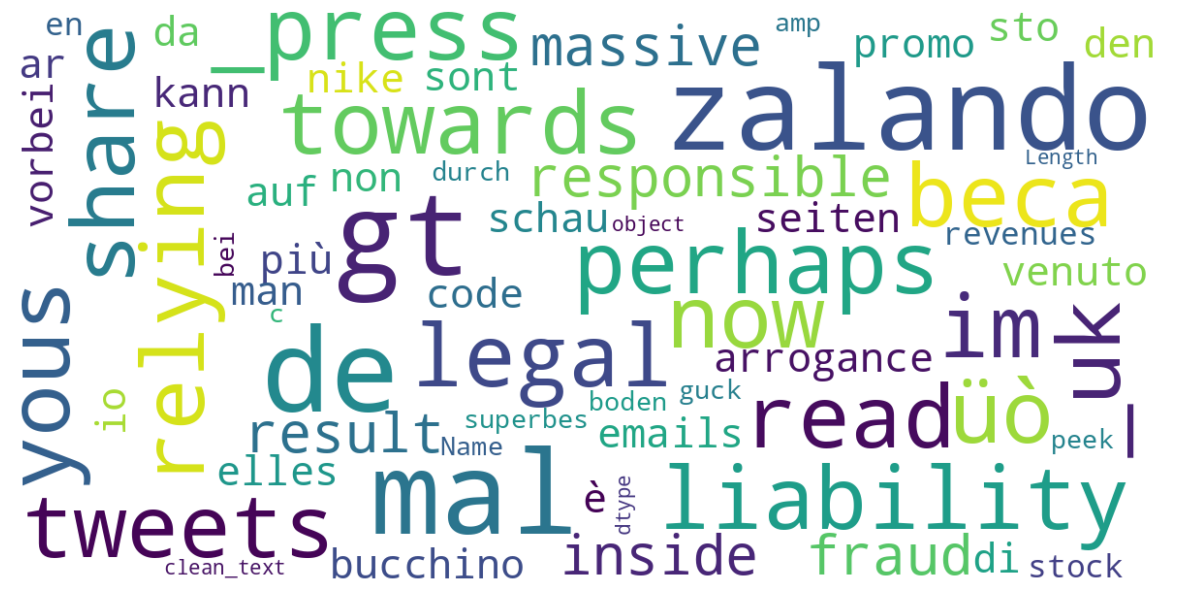

In [19]:
plot_wordcloud(df['clean_text'])

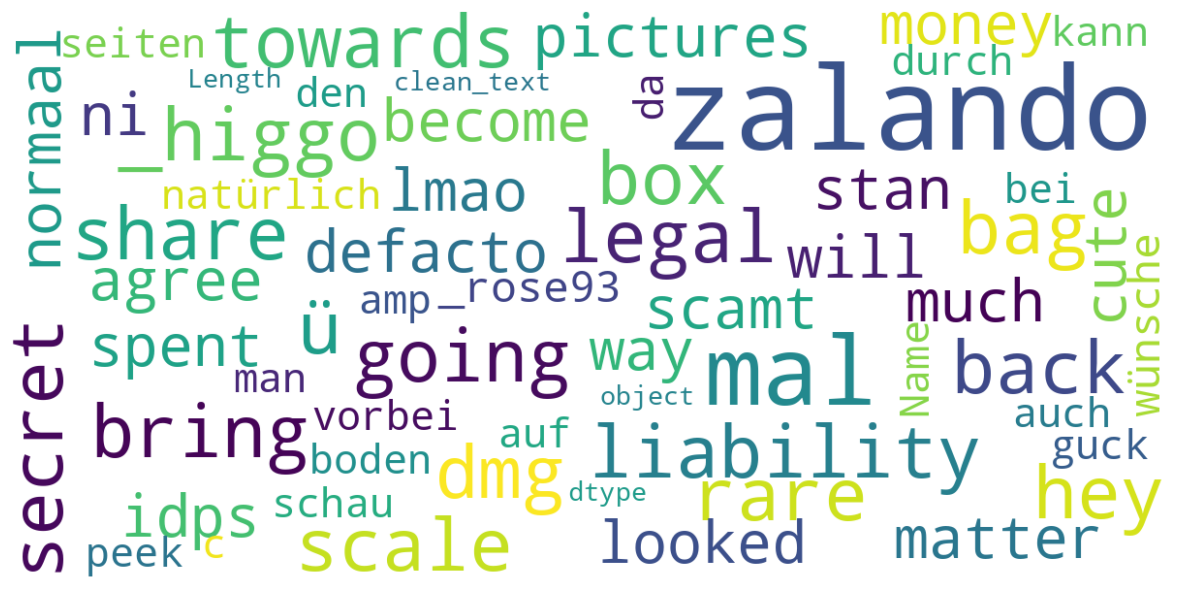

In [20]:
plot_wordcloud(df[df['sentiment']=="positive"]['clean_text'])

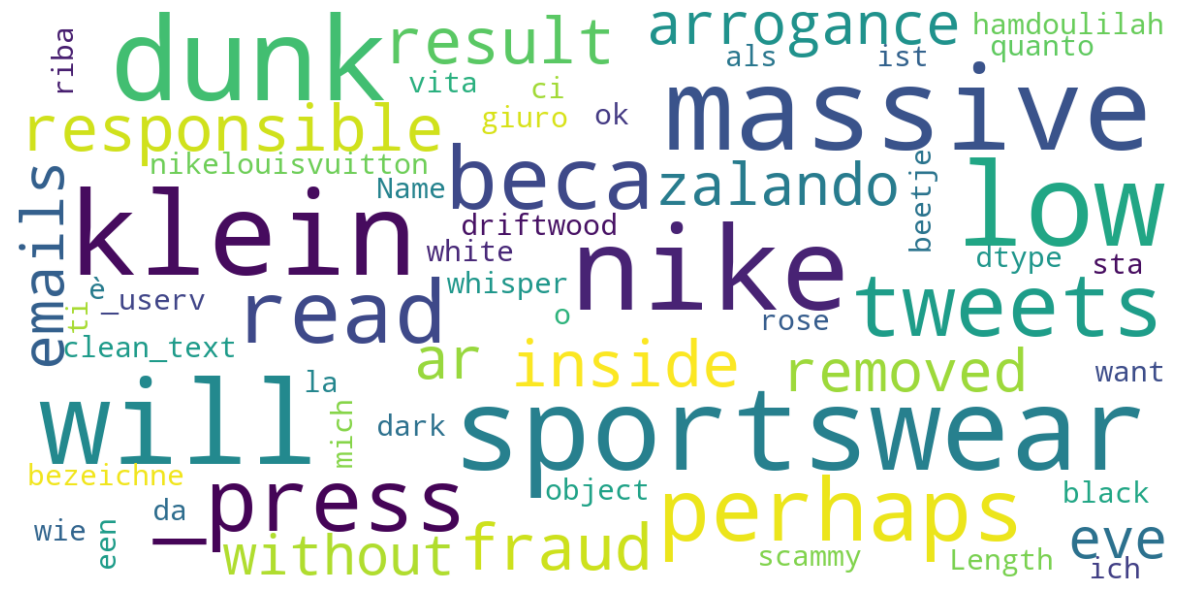

In [21]:
plot_wordcloud(df[df['sentiment']=="negative"]['clean_text'])

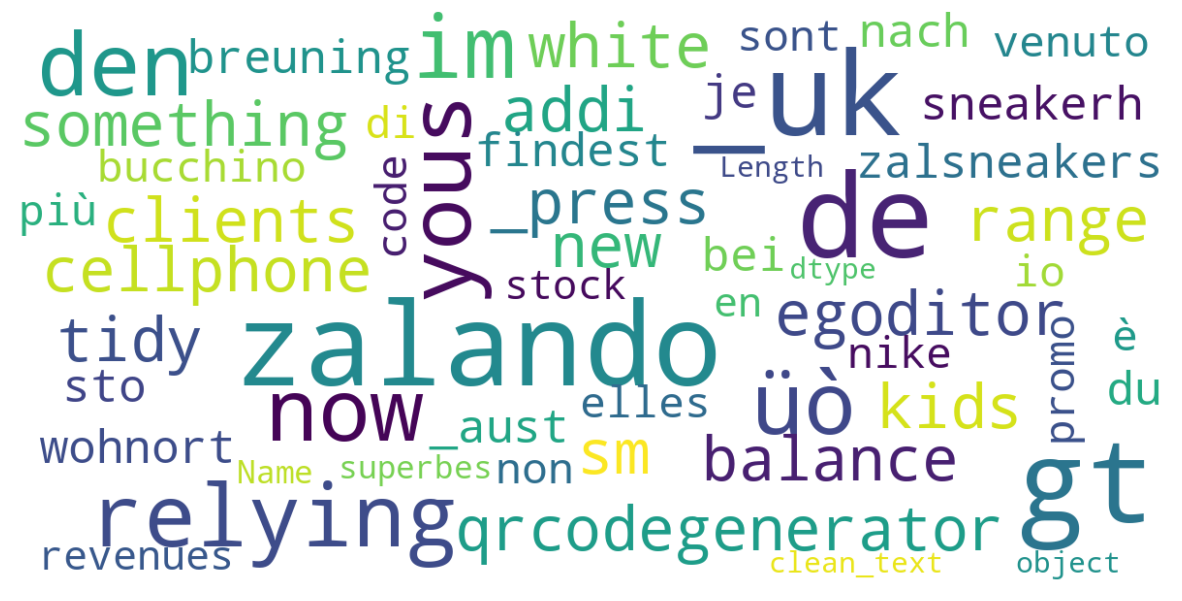

In [22]:
plot_wordcloud(df[df['sentiment']=="neutral"]['clean_text'])

Subjectivity vs. Polarity

In [23]:
def plot_polarity_subjectivity(data):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Polarity')
    ax.set_ylabel('Subjectivity')
    ax.set_title('Polarity vs. Subjectivity')
    ax.scatter(data['polarity_score'], data['subjectivity_score'])
    plt.show()

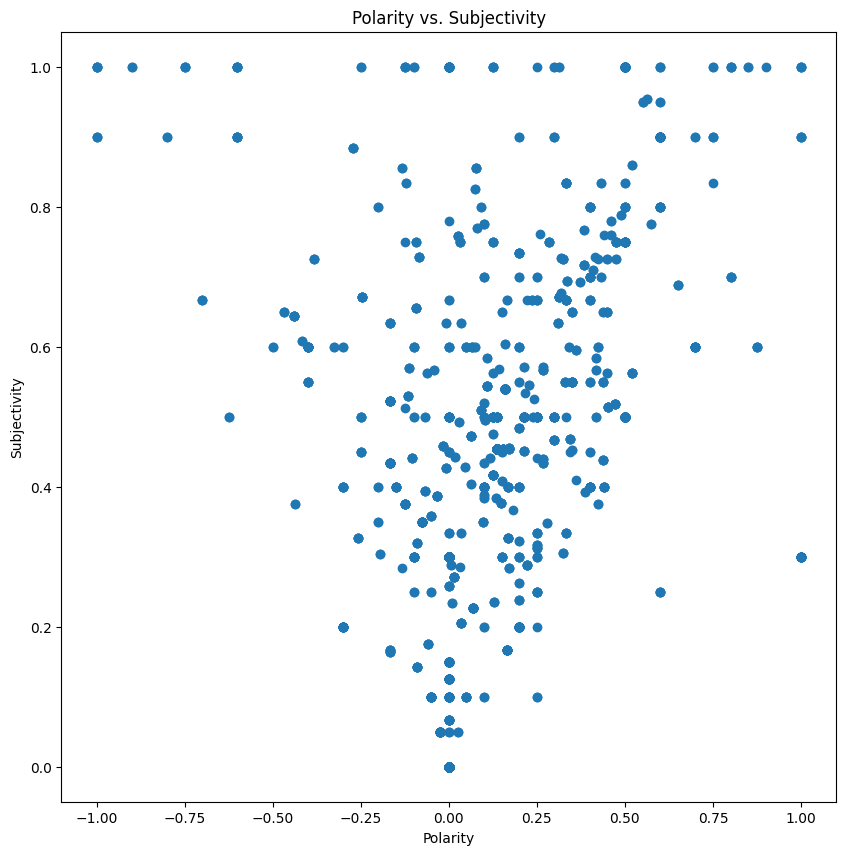

In [24]:
plot_polarity_subjectivity(df)

Sentiment Distribution

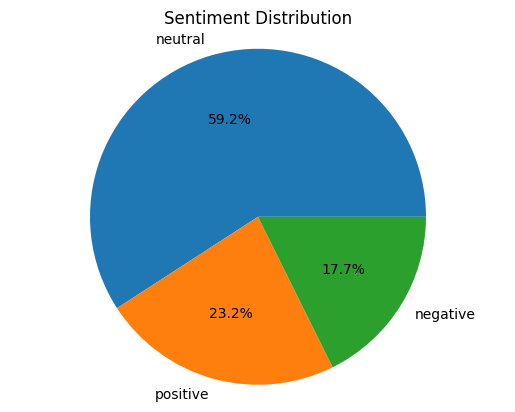

In [38]:
sentiment_counts = df["sentiment"].value_counts()

# create a pie chart of the sentiment counts
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.axis('equal')
plt.show()

Histogram

In [31]:
dr=df.groupby(['date','sentiment']).count()
dr

text  clean_text  sentiment_score  neg_score  neu_score  \
date       sentiment                                                            
01.01.23   negative     35          35               35         35         35   
           neutral      58          58               58         58         58   
           positive     76          76               76         76         76   
02.01.23   negative     41          41               41         41         41   
           neutral      72          72               72         72         72   
           positive     83          83               83         83         83   
03.01.23   negative     40          40               40         40         40   
           neutral      72          72               72         72         72   
           positive     72          72               72         72         72   
04.01.23   negative     37          37               37         37         37   
           neutral      65          65               65         65         65   
           positive     76          76               76         76         76   
05.01.23   negative     43          43               43         43         43   
           neutral      71          71               71         71         71   
           positive     87          87               87         87         87   
06.01.23   negative     43          43               43         43         43   
           neutral      75          75               75         75         75   
           positive     90          90               90         90         90   
07.01.23   negative     65          65               65         65         65   
           neutral     253         253              253        253        253   
           positive     78          78               78         78         78   
08.01.23   negative     81          81               81         81         81   
           neutral     314         314              314        314        314   
           positive     74          74               74         74         74   
09-01-2023 negative    201         201              201        201        201   
           neutral     827         827              827        827        827   
           positive    198         198              198        198        198   
10-01-2023 negative    201         201              201        201        201   
           neutral     827         827              827        827        827   
           positive    198         198              198        198        198   

                      pos_score  compound  polarity_score  subjectivity_score  
date       sentiment                                                           
01.01.23   negative          35        35              35                  35  
           neutral           58        58              58                  58  
           positive          76        76              76                  76  
02.01.23   negative          41        41              41                  41  
           neutral           72        72              72                  72  
           positive          83        83              83                  83  
03.01.23   negative          40        40              40                  40  
           neutral           72        72              72                  72  
           positive          72        72              72                  72  
04.01.23   negative          37        37              37                  37  
           neutral           65        65              65                  65  
           positive          76        76              76                  76  
05.01.23   negative          43        43              43                  43  
           neutral           71        71              71                  71  
           positive          87        87              87                  87  
06.01.23   negative          43        43              43            

In [37]:
import plotly.express as px
df_grouped = df.groupby(['date', 'sentiment']).size().reset_index(name='count')

# Plot line chart
fig = px.line(df_grouped, x='date', y='count', color='sentiment')
fig.show()



# Sentiment Analysis

NLP Machine learning

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
X=df['clean_text']
y=df['sentiment']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [28]:
classifier = MultinomialNB()
classifier.fit(train_vectors, y_train)

MultinomialNB()

In [29]:
predicted_labels = classifier.predict(test_vectors)

In [30]:
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8680430879712747
